In [33]:
from sympy import Symbol, plot, solve, Sum
from sympy.stats import Hypergeometric, density, Binomial
n1 = Symbol("n1")

In [34]:
bucket = 1
items = 1000
item = 500
trials = 2
assert items>item, "itemas > item"
print("buckets:", trials+1)
print(f"Items: 0-{items-1}: \n" + "".join("[_]" if i!=bucket else f"[{item}]" for i in range(trials+1)))
print()
print(f"Items: 0-{1}: \n" + "".join("[_]" if i!=bucket else f"[{item/items:f}]" for i in range(trials+1)))

print(density(Hypergeometric('H', items-1, item, trials))(bucket).evalf())
density(Binomial("X", trials, item/items))(bucket)

buckets: 3
Items: 0-999: 
[_][500][_]

Items: 0-1: 
[_][0.500000][_]
0.500500500500501


0.500000000000000

In [131]:
from itertools import pairwise


def pb(bucket, items, buckets):
    trials = buckets -1 
    return density(Hypergeometric('H', items-1, n1, trials))(bucket)

def hp(buckets, items):
    return (pb(i, items, buckets) for i in range(buckets))

def p_cuts(buckets, items):
    return (solve(a-b) for a,b in pairwise(hp(buckets, items)))

def opt_cuts(buckets, items):
    yield 0
    cuts = p_cuts(buckets, items)
    yield next(cuts)[0]
    for cut in cuts:
        yield cut[1]
        
def round_cuts(buckets, items):
    return (int(i) for i in opt_cuts(buckets, items))

def p_in_opt_cut(items, buckets):
    dic = {i: j for i,j in enumerate(hp(buckets, items))}
    return (dic[i].evalf(subs={n1: i}) for i in round_cuts(buckets, items))

def P(buckets, mini, maxi):
    if buckets ==1 :
        return 1
    items = maxi - mini
    s = 0
    for count, opt_bucket in round_cuts(buckets, items):
        s += Sum(.evalf(subs={n1: opt_bucket}))

In [132]:
list(p_cuts(3,10))

[[8/3, 9], [0, 19/3]]

In [133]:
list(round_cuts(3,10))

[0, 2, 6]

In [134]:
list(opt_cuts(3,11))

[0, 3, 7]

Buckets: 3


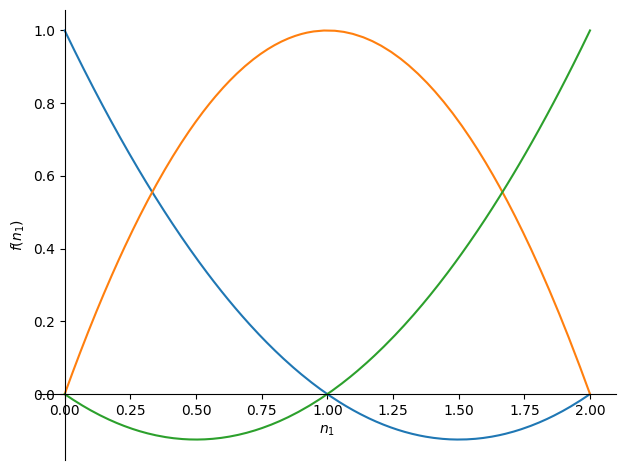

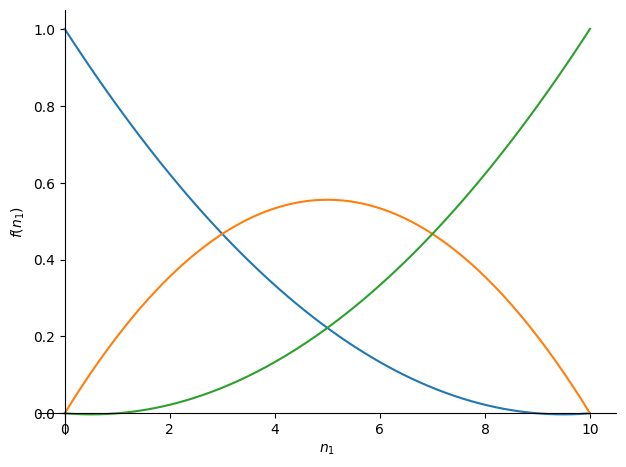

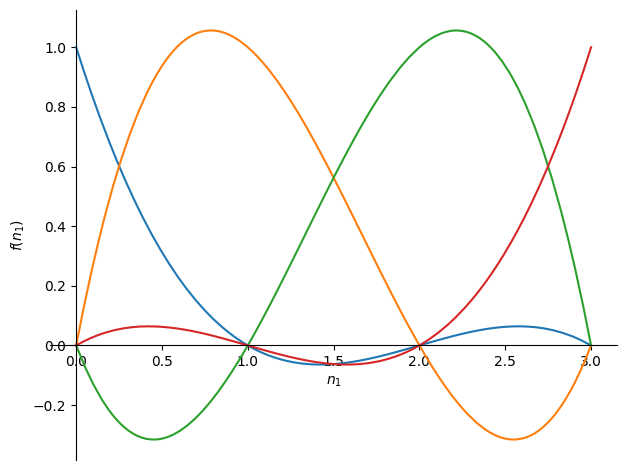

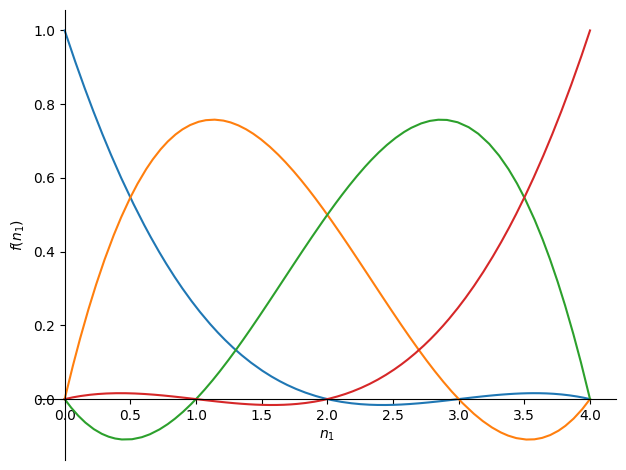

In [135]:
buckets = 3
print("Buckets:",buckets)
plot(*hp(buckets, 3), (n1, 0,2))
plot(*hp(buckets, 11), (n1, 0,10))
plot(*hp(4, 4), (n1, 0,3))
plot(*hp(4, 5), (n1, 0,4))

In [151]:
list(hp(4, 5))[0].evalf(subs={n1:0})

1.00000000000000